# Introduction
There are various forms of crimes occurring in India every day. Some of them are listed below:
*  Crime over time
  *  Murder
  *  Kidnapping
  *  Roberry
*  Crime against Women
  *  Rape 
  *  Dowry
  *  Domestic Violence
*  Organised crimes
  *  Illegal drug trade
*  and so on.....

The dataset I have used to visualize different crimes in India is downloaded from [data.world](https://data.world/rajanand/crime-in-india). Three datasets contain district wise IPC crimes occurred in India from 2001 to 2014. One dataset contain area wise police counts from year 2001 to 2010.


## Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load Datasets

In [2]:
crime_data1 = pd.read_csv("/content/drive/My Drive/Datasets/Crimes in India/District_wise_crimes_committed_IPC_2001_2012.csv")
crime_data2 = pd.read_csv("/content/drive/My Drive/Datasets/Crimes in India/District_wise_crimes_committed_IPC_2013.csv")
crime_data3 = pd.read_csv("/content/drive/My Drive/Datasets/Crimes in India/District_wise_crimes_committed_IPC_2014.csv")

In [3]:
crime_data1.head(1)

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,30,16,9,0,41,198,199,22,177,78,16,104,1,30,1131,16,149,34,175,0,181,1518,4154


In [4]:
crime_data2.head(1)

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,Andhra Pradesh,ADILABAD,2013,96,72,13,61,0,61,65,47,18,2,0,14,274,377,86,291,58,93,254,1,30,2394,12,197,138,464,0,376,1390,6381


In [5]:
crime_data3.head(1)

,States/UTs,District,Year,Murder,Attempt to commit Murder,Culpable Homicide not amounting to Murder,Attempt to commit Culpable Homicide,Rape,Custodial Rape,Custodial_Gang Rape,Custodial_Other Rape,Rape other than Custodial,Rape_Gang Rape,Rape_Others,Attempt to commit Rape,Kidnapping & Abduction_Total,Kidnapping & Abduction,Kidnapping & Abduction in order to Murder,Kidnapping for Ransom,Kidnapping & Abduction of Women to compel her for marriage,Other Kidnapping,Dacoity,Dacoity with Murder,Other Dacoity,Making Preparation and Assembly for committing Dacoity,Robbery,Criminal Trespass/Burglary,Criminal Trespass or Burglary,House Trespass & House Breaking,Theft,Auto Theft,Other Thefts,Unlawful Assembly,Riots,Riots_Communal,Riots_Industrial,Riots_Political,Riots_Caste Conflict,Riots_SC/STs Vs Non-SCs/STs,Riots_Other Caste Conflict,...,Counterfeiting currency notes/Bank notes,Using forged or counterfeiting currency/Bank notes,Possession of forged or counterfeiting currency/Bank notes,Making or Possessing materials for forged currency/Bank notes,Making or Using documents resembling currency,Arson,Grievous Hurt,Hurt,Acid attack,Attempt to Acid Attack,Dowry Deaths,Assault on Women with intent to outrage her Modesty,Sexual Harassment,Assault or use of criminal force to women with intent to Disrobe,Voyeurism,Stalking,Other Assault on Women,Insult to the Modesty of Women,At Office premises,Other places related to work,In Public Transport system,"Places other than 231, 232 & 233",Cruelty by Husband or his Relatives,Importation of Girls from Foreign Country,Causing Death by Negligence,Deaths due to negligent driving/act,Deaths due to Other Causes,Offences against State,Sedition,Other offences against State,Offences promoting enmity between different groups,Promoting enmity between different groups,"Imputation, assertions prejudicial to national integration",Extortion,Disclosure of Identity of Victims,Incidence of Rash Driving,HumanTrafficking,Unnatural Offence,Other IPC crimes,Total Cognizable IPC crimes
0,Andhra Pradesh,Anantapur,2014,134,171,8,0,35,0,0,0,35,0,35,1,125,0,0,0,88,37,6,0,6,0,30,415,315,100,753,240,513,0,214,0,0,0,0,0,0,...,10,0,0,0,0,12,25,24,1,0,25,436,82,34,4,80,236,26,0,0,0,26,165,0,638,638,0,0,0,0,0,0,0,0,0,1038,0,0,3800,8376


In [6]:
crime_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9017 non-null   object
 1   DISTRICT                                             9017 non-null   object
 2   YEAR                                                 9017 non-null   int64 
 3   MURDER                                               9017 non-null   int64 
 4   ATTEMPT TO MURDER                                    9017 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9017 non-null   int64 
 6   RAPE                                                 9017 non-null   int64 
 7   CUSTODIAL RAPE                                       9017 non-null   int64 
 8   OTHER RAPE                                           9017 non-null   int64 
 9

In [7]:
crime_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             823 non-null    object
 1   DISTRICT                                             823 non-null    object
 2   YEAR                                                 823 non-null    int64 
 3   MURDER                                               823 non-null    int64 
 4   ATTEMPT TO MURDER                                    823 non-null    int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            823 non-null    int64 
 6   RAPE                                                 823 non-null    int64 
 7   CUSTODIAL RAPE                                       823 non-null    int64 
 8   OTHER RAPE                                           823 non-null    int64 
 9  

In [8]:
crime_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 0 to 837
Data columns (total 91 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   States/UTs                                                        838 non-null    object
 1   District                                                          838 non-null    object
 2   Year                                                              838 non-null    int64 
 3   Murder                                                            838 non-null    int64 
 4   Attempt to commit Murder                                          838 non-null    int64 
 5   Culpable Homicide not amounting to Murder                         838 non-null    int64 
 6   Attempt to commit Culpable Homicide                               838 non-null    int64 
 7   Rape                                        

Two datasets (data1 and data2) have same features. data1 contains crimes from the year 2001 to 2012  while data2 contains crimes occurred in the year 2013 .

In [9]:
# Concatenating crime_data1 and crime_data2 as both of them have same features
crime_data_01_13 = pd.concat([crime_data1, crime_data2], axis = 0)
crime_data_14 = crime_data3.copy()

In [10]:
# Total number of observation in crime_data_01_13 (data from year 2001 to 2013)
len(crime_data_01_13)

9840

## Exploratory Data Analysis

In [11]:
# Reset index and drop the index
crime_data_01_13.reset_index(inplace=True)
crime_data_01_13.drop('index', axis = 1, inplace = True)

In [12]:
# converting the entries in STATE/UT to upper
crime_data_01_13['STATE/UT'] = crime_data_01_13['STATE/UT'].str.upper()

In [13]:
crime_data_01_13['STATE/UT'].unique()     # states or union territory in India

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI UT', 'LAKSHADWEEP', 'PUDUCHERRY',
       'A&N ISLANDS', 'D&N HAVELI'], dtype=object)

In [14]:
# Different crimes in India
crime_data_01_13.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [15]:
# Total number of different crimes in India from the year 2001 to 2013.
for year in range(2001, 2014):
  print('*' * 10, year, '*' * 10)
  print(crime_data_01_13[crime_data_01_13['YEAR'] == year].drop(['YEAR', 'STATE/UT', 'DISTRICT'], axis = 1).sum().sort_values(ascending = False))

********** 2001 **********
TOTAL IPC CRIMES                                       3538616
OTHER IPC CRIMES                                       1402724
HURT/GREVIOUS HURT                                      542974
THEFT                                                   505606
OTHER THEFT                                             378180
BURGLARY                                                202364
RIOTS                                                   152444
AUTO THEFT                                              127426
CAUSING DEATH BY NEGLIGENCE                             114364
CRUELTY BY HUSBAND OR HIS RELATIVES                      98340
CHEATING                                                 89454
MURDER                                                   72404
ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY      68248
ATTEMPT TO MURDER                                        63046
KIDNAPPING & ABDUCTION                                   44974
ROBBERY                     

### State wise analysis

In [16]:
# total number of crimes that occured in different states of India in the year between 2001 to 2013
state_wise_crime = crime_data_01_13.drop('YEAR', axis = 1).groupby('STATE/UT').sum()
state_wise_crime.head()

,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
STATE/UT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A & N ISLANDS,320,130,42,218,0,218,188,154,34,30,0,148,1784,2248,170,2078,280,144,506,22,196,2210,12,428,86,242,0,84,8886,18204
A&N ISLANDS,12,8,2,54,0,54,28,24,4,2,0,2,84,74,4,70,0,10,50,0,4,110,2,90,16,18,0,12,646,1224
ANDHRA PRADESH,68480,49338,3866,30228,4,30224,46716,33062,13654,4224,170,16628,214312,636444,163368,473076,58806,27366,223716,6694,25800,1214106,13414,117858,81666,268182,34,304152,1061792,4473992
ARUNACHAL PRADESH,1820,906,78,1150,0,1150,1998,1288,710,568,8,1836,5952,11384,2458,8926,752,1060,1184,104,546,11310,4,1754,42,392,0,1748,16260,60856
ASSAM,33572,12482,1544,36230,10,36220,65480,54284,11196,8832,524,16780,78086,191980,38416,153564,74784,19748,29898,1964,17422,154708,2892,32058,252,96048,20,66538,428058,1369900


### Murders in different states

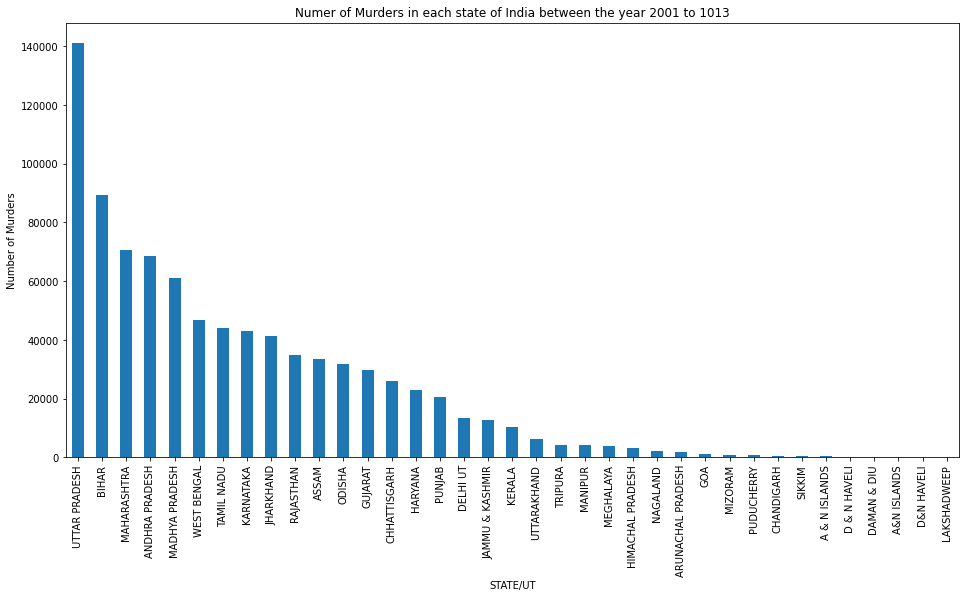

In [17]:
# States with highest number of murders
plt.figure(figsize=(16,8))
state_wise_crime.sort_values(by = 'MURDER', ascending=False)['MURDER'].plot(kind = 'bar')
plt.title('Numer of Murders in each state of India between the year 2001 to 1013')

plt.ylabel('Number of Murders')
plt.show()

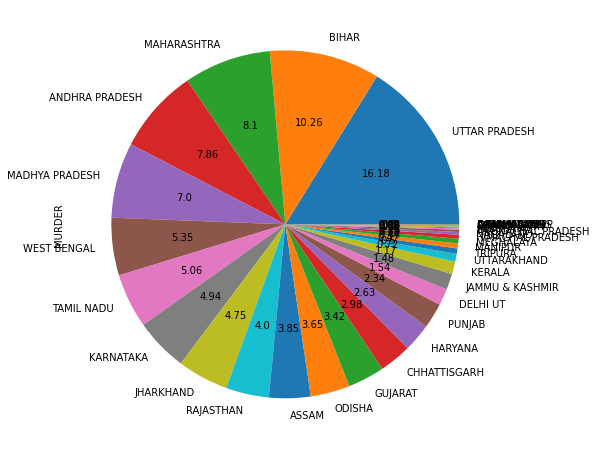

In [18]:
plt.figure(figsize=(16,8))
def value(val):
    per = np.round(val , 2)
    return per
state_wise_crime.sort_values(by = 'MURDER', ascending=False)['MURDER'].plot(kind = 'pie', autopct = value)

Uttar Pradesh, Bihar, Maharashtra, Anddhra Pradesh, Madhya Pradesh are the top 5 Statest with highest number of murders.

### Rapes in different states


<Figure size 1152x576 with 0 Axes>

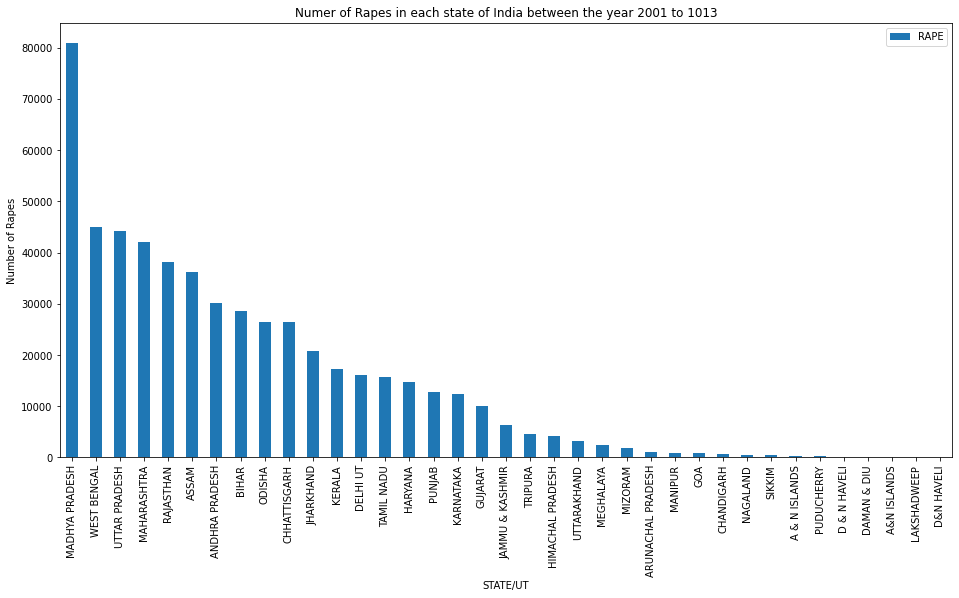

In [20]:
# States with highest number of Rapes in the year 2001 to 2013
plt.figure(figsize=(16,8))
state_wise_crime.sort_values(by = 'RAPE', ascending=False)[['RAPE']].plot(kind = 'bar', figsize = (16, 8))
plt.title('Numer of Rapes in each state of India between the year 2001 to 1013')

plt.ylabel('Number of Rapes')
plt.show()

*  RAPE and OTHER RAPE columns are duplicate of each other.
*  Most of the Rapes cases reported in the year from 2001 to 2013 in the following states: Madhya Pradesh, West Bengal, Uttar Pradesh, Maharashtra, Rajasthan.

### Major Crimes
Some of the major crimes that occurs in India are like:
*  Murders
*  Rapes
*  Insult to modesty of Women
*  Importation of Girls from Foreign Countries

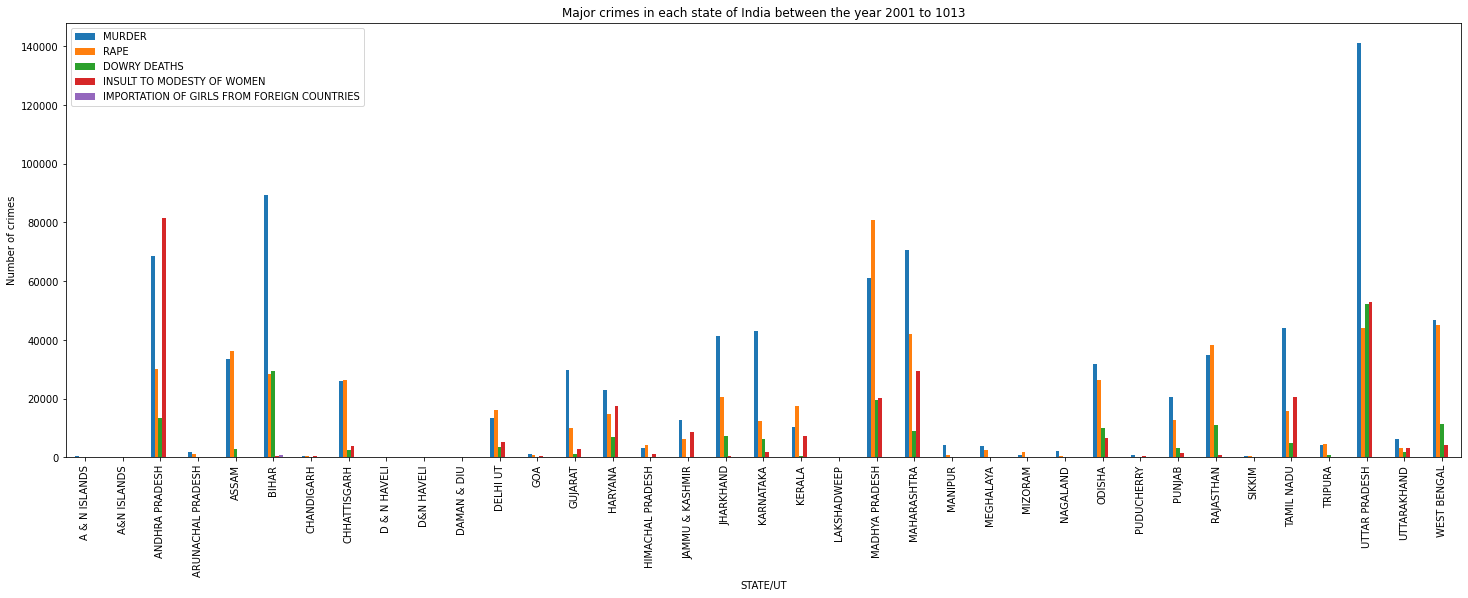

In [21]:
major_crimes = ['MURDER', 'RAPE', 'DOWRY DEATHS',
                'INSULT TO MODESTY OF WOMEN', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES']

# States with major crimes in the year 2001 to 2013
state_wise_crime[major_crimes].plot(kind = 'bar', figsize = (25, 8))
plt.title('Major crimes in each state of India between the year 2001 to 1013')

plt.ylabel('Number of crimes')
plt.show()

In [22]:
# 20 States with highest number of total IPC crimes in the year between 2001 to 2013
state_wise_crime['TOTAL IPC CRIMES'].sort_values(ascending = False)[:20]

STATE/UT
MADHYA PRADESH      5282446
MAHARASHTRA         5015642
TAMIL NADU          4527510
ANDHRA PRADESH      4473992
UTTAR PRADESH       4169038
RAJASTHAN           4104280
KARNATAKA           3235504
KERALA              3227586
GUJARAT             3086420
BIHAR               3027496
WEST BENGAL         2577678
ODISHA              1439328
DELHI UT            1426716
ASSAM               1369900
HARYANA             1334802
CHHATTISGARH        1235794
JHARKHAND            941118
PUNJAB               841596
JAMMU & KASHMIR      569090
HIMACHAL PRADESH     337396
Name: TOTAL IPC CRIMES, dtype: int64

[]

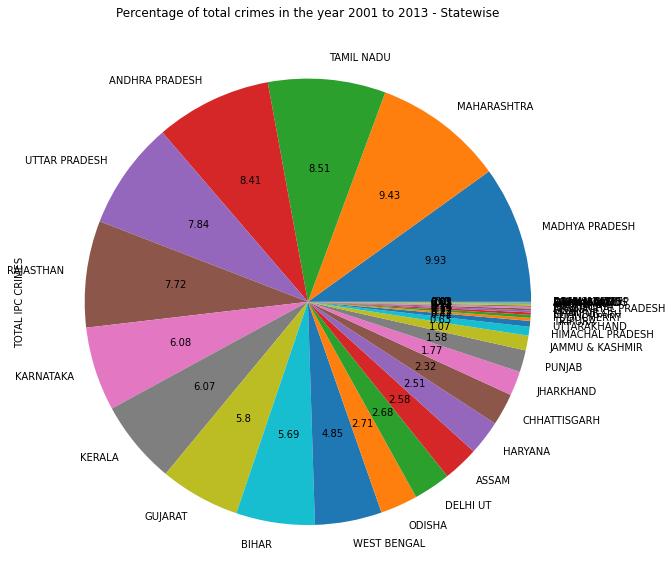

In [23]:
# States with highest number of total crimes in the year between 2001 to 2013
def value(val):
    per = np.round(val , 2)
    return per

state_wise_crime['TOTAL IPC CRIMES'].sort_values(ascending = False).plot(kind = 'pie', figsize = (10, 16), autopct = value)
plt.title('Percentage of total crimes in the year 2001 to 2013 - Statewise')
plt.plot()

## Total Police Counts and Total Crimes Counts in the year 2001 to 2010 in India: Statewise

In [29]:
# Droping some not major crimes
col_to_remove = ['CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'CUSTODIAL RAPE', 'OTHER RAPE', 
                 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS', 'KIDNAPPING AND ABDUCTION OF OTHERS', 'PREPARATION AND ASSEMBLY FOR DACOITY',
                 'AUTO THEFT', 'OTHER THEFT', 'CRIMINAL BREACH OF TRUST', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
                 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY', 'CAUSING DEATH BY NEGLIGENCE']
crime_data_01_10 = crime_data1.drop(col_to_remove, axis = 1)
crime_data_01_10 = crime_data_01_10[crime_data_01_10['YEAR'] != 2011]
crime_data_01_10 = crime_data_01_10[crime_data_01_10['YEAR'] != 2012]

In [30]:
# Load police data
police_data_01_10 = pd.read_csv("/content/drive/My Drive/Datasets/Crimes in India/Police_strength_actual_and_sanctioned.csv")

In [31]:
police_data_01_10.sample(2)

,Area_Name,Year,Group_Name,Sub_Group_Name,Rank_All_Ranks_Total,Rank_ASI_Equivalent,Rank_ASPDySPAssttCommandant,Rank_Below_HC_and_Above_Constables,Rank_Constables,Rank_DGAddl_DG,Rank_DIG,Rank_Head_Constables,Rank_IGSplIG,Rank_Inspectors_Equivalent,Rank_SI_Equivalent,Rank_SSPSPAddlSPCommandant
2185,Meghalaya,2003,Sanctioned Police Strength - Armed Police,C2. Santioned Armed Police (Incl. Women Police),3879,0,30,262,2861,0,0,579,0,36,99,12
3189,Jammu & Kashmir,2002,Sanctioned Women Police Strength - Armed Police,D2. Sanctioned Women Armed Police,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
police_data_01_10.Area_Name.unique()

array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal',
       'Jharkhand'], dtype=object)

In [33]:
crime_data_01_10['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI UT', 'LAKSHADWEEP', 'PUDUCHERRY'],
      dtype=object)

*  Same satate have different names in both the dataframe. So making the names same in both the dataframe

*  State names in police_data dataframe and state names in crime data dataframe are not in same case. So convert them into same case i.e. lower case

In [34]:
# changing state names
def change_state_names(state_name):
  if state_name == 'A & N ISLANDS' or state_name == "Andaman & Nicobar Islands":
    return 'andaman & nicobar islands'
  elif state_name == 'D & N HAVELI' or state_name == 'Dadra & Nagar Haveli':
    return 'dadar & nagar haveli'
  elif state_name == 'Delhi' or state_name == 'DELHI UT':
    return 'delhi'
  else:
    return state_name

crime_data_01_10['STATE/UT'] = crime_data_01_10['STATE/UT'].apply(change_state_names)
police_data_01_10['Area_Name'] = police_data_01_10['Area_Name'].apply(change_state_names)

In [35]:
# Case conversion
crime_data_01_10['STATE/UT'] = crime_data_01_10['STATE/UT'].str.lower()
police_data_01_10['Area_Name'] = police_data_01_10['Area_Name'].str.lower()

In [36]:
# Area_Name in police dataframe represents state, so renaming the column name
police_data_01_10.rename(columns={'Area_Name':'State'}, inplace = True)

In [37]:
from numpy import sort

In [38]:
sort(crime_data_01_10['STATE/UT'].unique()) == sort(police_data_01_10['State'].unique())

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [39]:
sort(crime_data_01_10['YEAR'].unique()) == sort(police_data_01_10['Year'].unique())

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

Both dataframe crime_data and police_data have now same column names and years

In [40]:
States = sort(crime_data_01_10['STATE/UT'].unique())
years = sort(crime_data_01_10['YEAR'].unique())

In [41]:
total_crimes = []
police_counts = []
states = []
Years = []

# storing the total crimes occurred in a year in a list total_crime and total police counts in a year in police counts
# this will help to compare the police counts in a state in that particular state and total crimes occurred in that state in the same year
for state in States:
  for year in years:
    total_crimes.append(crime_data_01_10[(crime_data_01_10['STATE/UT'] == state) & (crime_data_01_10['YEAR'] == year)]['TOTAL IPC CRIMES'].sum())
    police_counts.append(police_data_01_10[(police_data_01_10['State'] == state) & (police_data_01_10['Year'] == year)]['Rank_All_Ranks_Total'].sum())
    states.append(state)
    Years.append(year)

In [42]:
len(total_crimes), len(police_counts), len(states), len(Years)

(350, 350, 350, 350)

In [43]:
# Creating dataframe of crimes count and police counts in each year in each state
statewise_crimes_and_police_counts = pd.DataFrame({'State': states, 'Year': Years, 'total_crimes_count': total_crimes, 'total_police_count': police_counts})

In [44]:
statewise_crimes_and_police_counts

,State,Year,total_crimes_count,total_police_count
0,andaman & nicobar islands,2001,1316,11770
1,andaman & nicobar islands,2002,1216,12484
2,andaman & nicobar islands,2003,1288,11494
3,andaman & nicobar islands,2004,1496,11618
4,andaman & nicobar islands,2005,1364,11658
...,...,...,...,...
345,west bengal,2006,136104,355060
346,west bengal,2007,162204,378878
347,west bengal,2008,210838,359364
348,west bengal,2009,226072,375106


#### Crime counts in each state in the year between 2001 to 2010

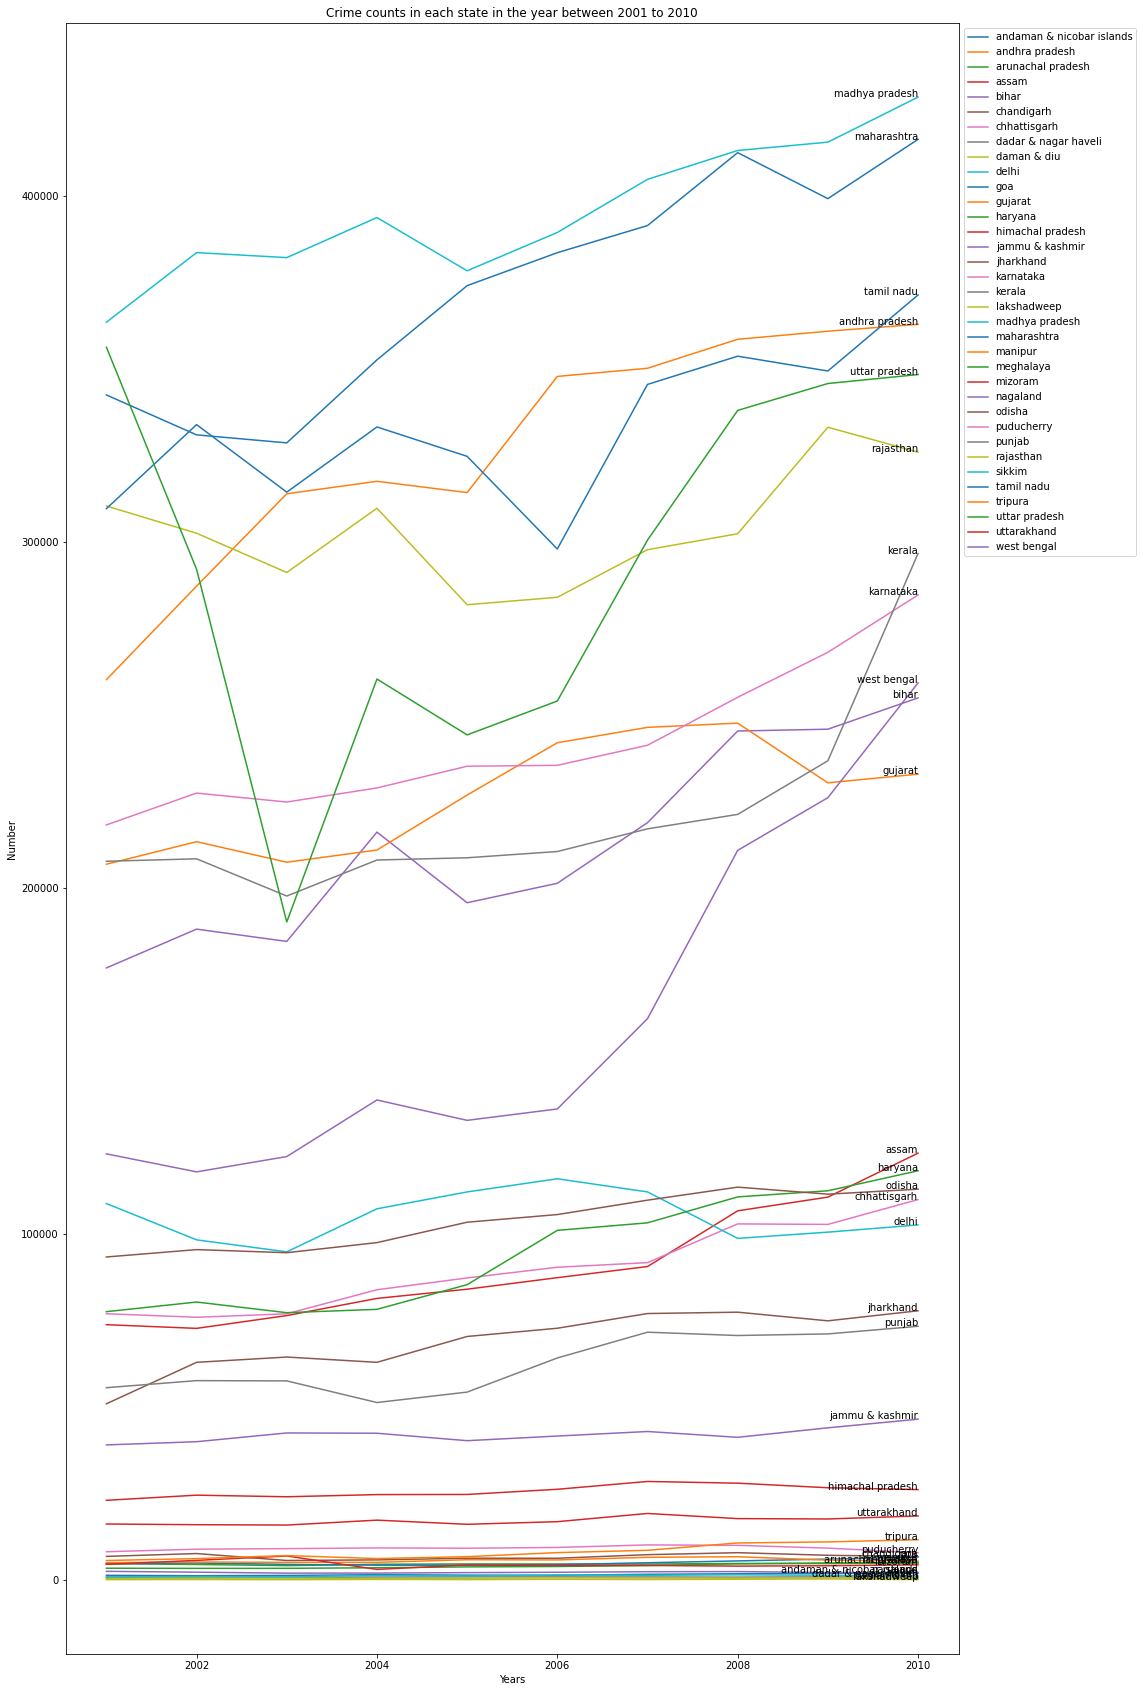

In [ ]:
x = [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]
plt.figure(figsize = (16, 30))

for state in statewise_crimes_and_police_counts.State.unique():
  state_data = statewise_crimes_and_police_counts[statewise_crimes_and_police_counts.State == state]
  plt.plot(x, state_data.total_crimes_count)
  plt.xlabel('Years')
  plt.ylabel('Number')
  plt.title('Crime counts in each state in the year between 2001 to 2010')
  plt.text(2010,state_data[(state_data['Year'] == 2010) & (state_data['State'] == state)].total_crimes_count,state,horizontalalignment='right')
  
plt.legend(statewise_crimes_and_police_counts.State.unique(), bbox_to_anchor=(1, 1))
plt.show()

#### Police counts in each state in the year between 2001 to 2010

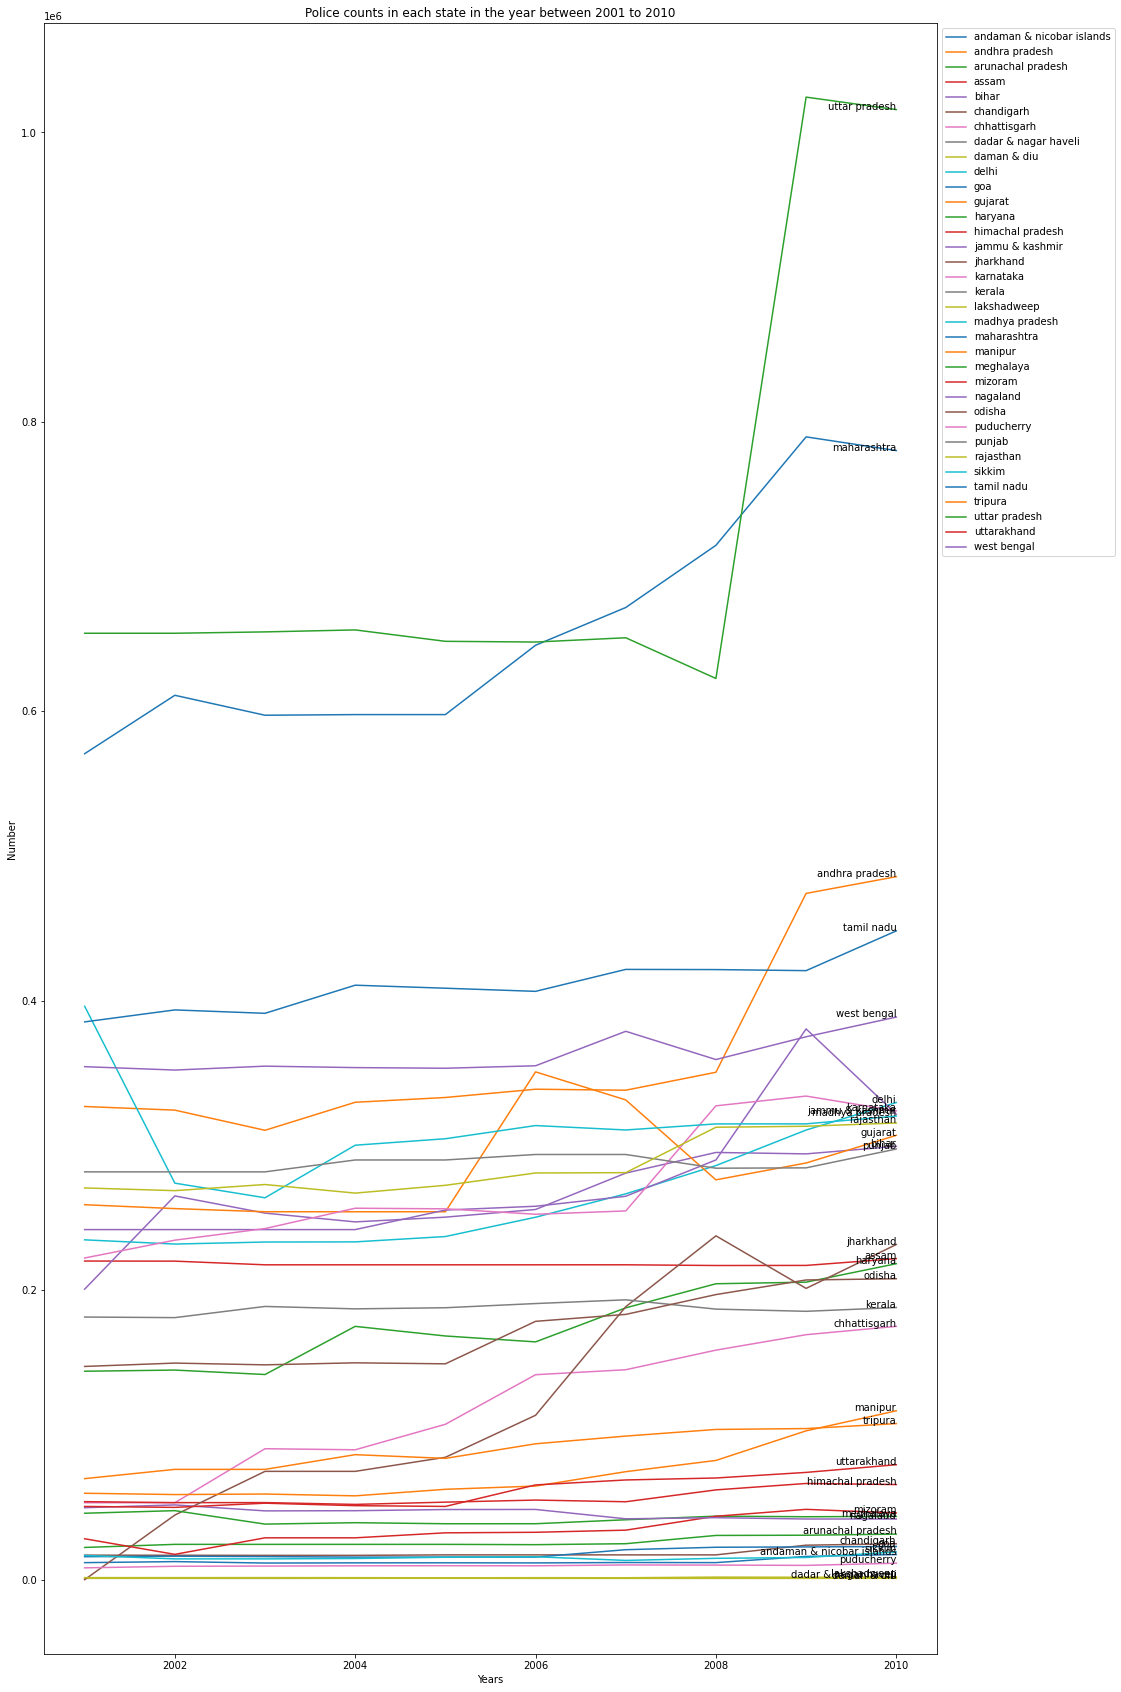

In [ ]:
x = [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]
plt.figure(figsize = (16, 30))

for state in statewise_crimes_and_police_counts.State.unique():
  state_data = statewise_crimes_and_police_counts[statewise_crimes_and_police_counts.State == state]
  plt.plot(x, state_data.total_police_count)
  plt.xlabel('Years')
  plt.ylabel('Number')
  plt.title('Police counts in each state in the year between 2001 to 2010')
  plt.text(2010,state_data[(state_data['Year'] == 2010) & (state_data['State'] == state)].total_police_count,state,horizontalalignment='right')
  
plt.legend(statewise_crimes_and_police_counts.State.unique(), bbox_to_anchor=(1, 1))
plt.show()

*  There was a high increase in number of police in Uttar Pradesh from year 2008 to 2009 and the count was nearly same from year 2009 to 2010

*  Nearly in all states the number of police kept increasing from year 2001 to 2010

#### Total Number of police and total number of crimes occured in between years 2001 and 2010 - Statewise

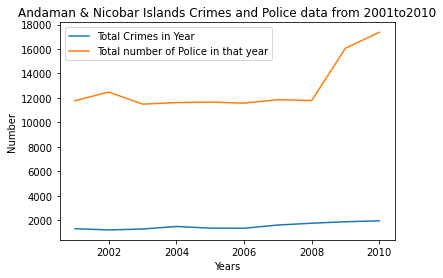

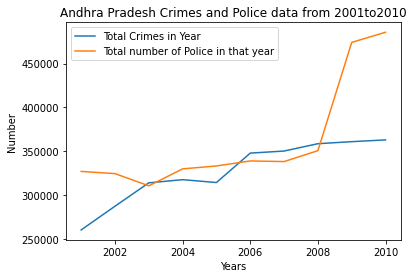

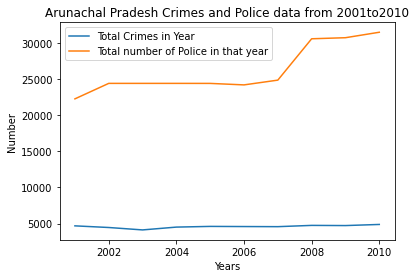

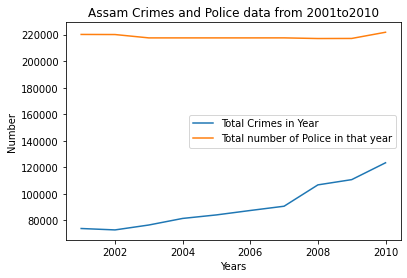

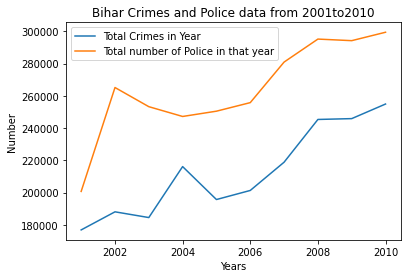

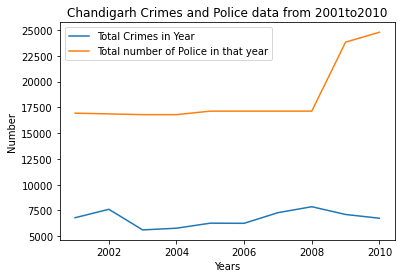

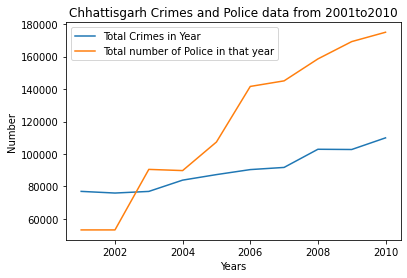

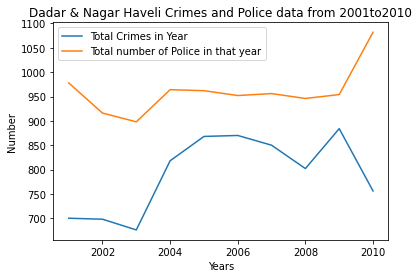

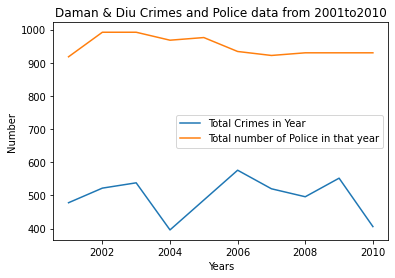

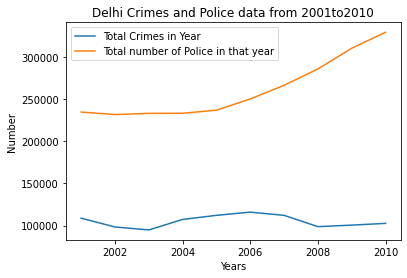

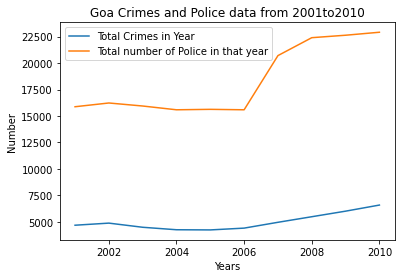

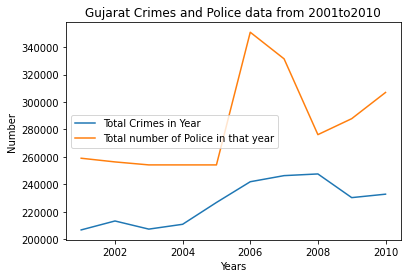

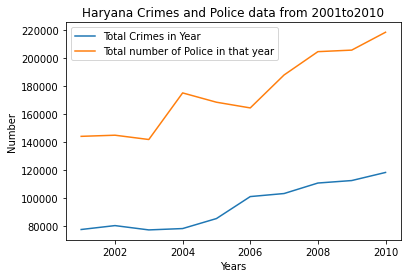

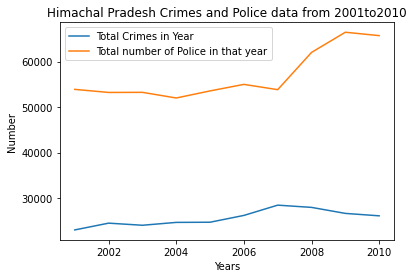

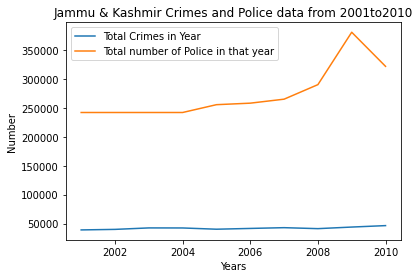

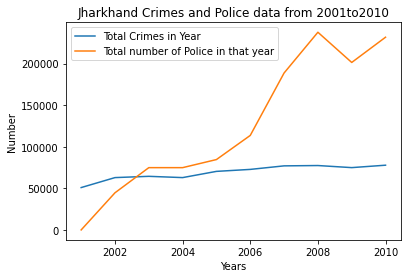

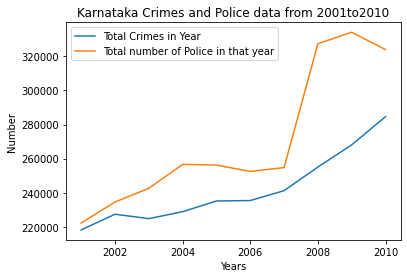

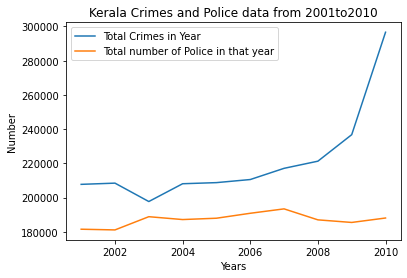

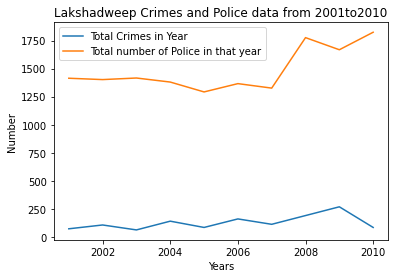

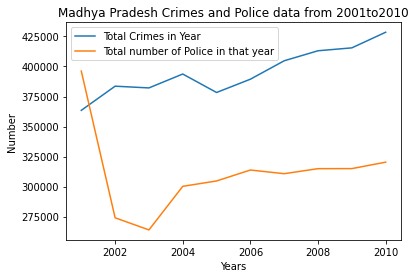

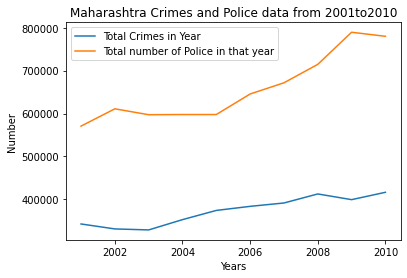

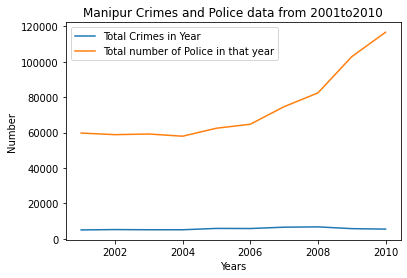

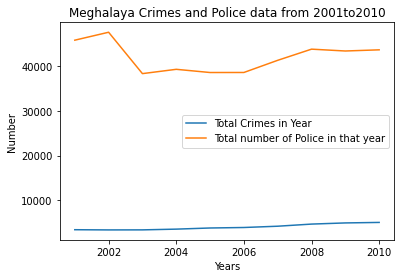

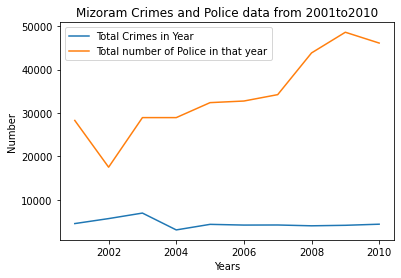

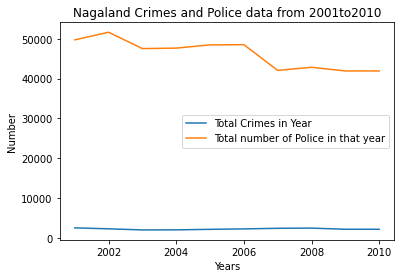

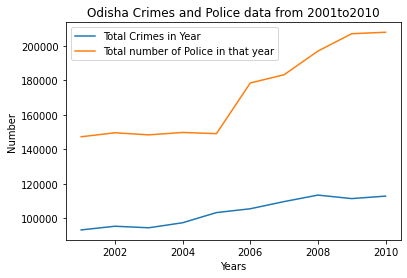

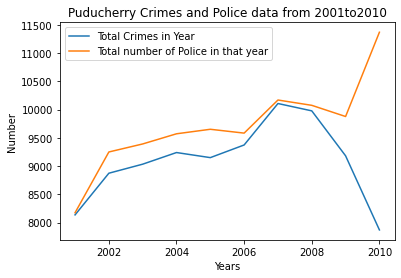

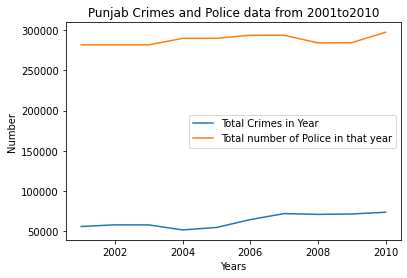

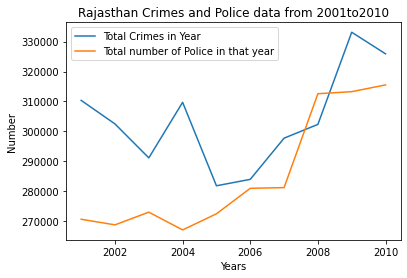

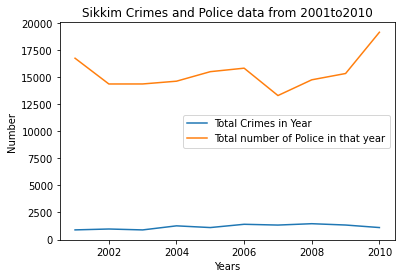

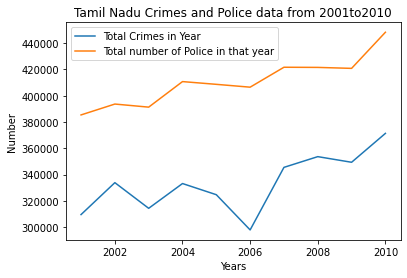

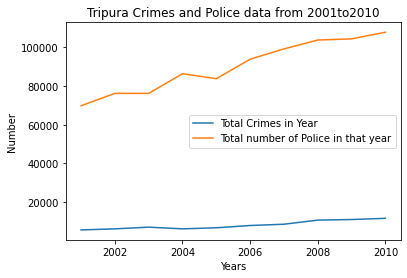

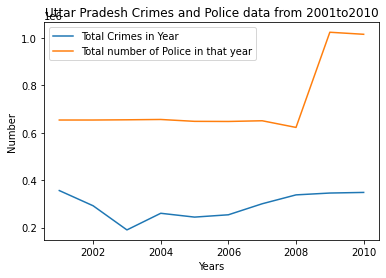

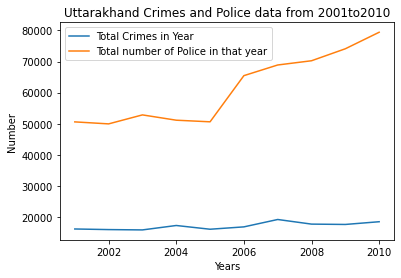

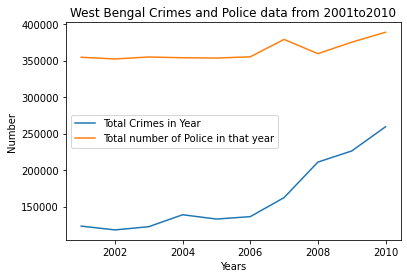

In [ ]:
x = [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]
legends = ['Total Crimes in Year', 'Total number of Police in that year']
for state in statewise_crimes_and_police_counts.State.unique():
  state_data = statewise_crimes_and_police_counts[statewise_crimes_and_police_counts.State == state]
  plt.plot(x, state_data.total_crimes_count)
  plt.plot(x, state_data.total_police_count)
  plt.xlabel('Years')
  plt.ylabel('Number')
  plt.title(state.title() + ' Crimes and Police data from ' + str(x[0]) + 'to' + str(x[-1]))
  plt.legend(legends)
  plt.show()

*  In all the states, the number of police is more than the number of crimes occurred in a particular year for a particular state.